# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [92]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

In [7]:
data = pd.read_csv('../data/absences.csv',index_col=0)
data

,EmployeeID,Age,Absences
0,1,27,15
1,2,61,6
2,3,37,10
3,4,23,18
4,5,46,9
5,6,58,7
6,7,29,14
7,8,36,11
8,9,64,5
9,10,40,8


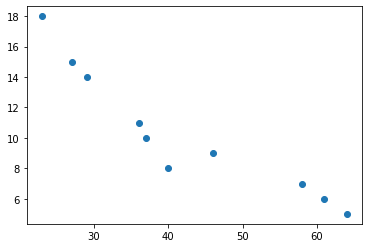

In [26]:
age = data['Age']
absences = data['Absences']

fig, ax = plt.subplots()
ax.plot(age,absences,'o')

In [ ]:
#Yes, there seems to be a linear correlation: younger employees have more absences, as expected

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [69]:
def slin(x,y):
    
    # y = a*x + b
    
    ym = np.mean(y)
    xm = np.mean(x)
    x2m = np.mean(x**2)
    xym = np.mean(x*y)
    
    b = ym - xm*(xym-xm*ym)/(x2m-xm**2)
    
    a = (xym-xm*ym)/(x2m-xm**2)
    
    return a,b

#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

-0.26810883370334093
21.587381898910657


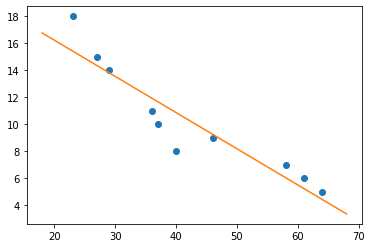

In [85]:
a , b = slin(age,absences)
print(a)
print(b)

xlins = np.arange(min(age)-5,max(age)+5)

ylins = a*xlins+b

fig, ax = plt.subplots()
ax.plot(age,absences,'o')
ax.plot(xlins,ylins)

<AxesSubplot:xlabel='Age', ylabel='Absences'>

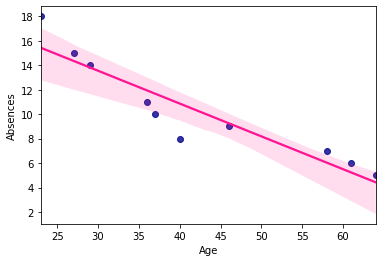

In [93]:
sns.regplot(x='Age',y='Absences',data=data,scatter_kws={'color':'darkblue'},line_kws={'color':'deeppink'})

In [72]:
# Seems accurate

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [97]:
def covcor(x,y):
    
    xm = np.mean(x)
    ym = np.mean(y)
    
    n = len(x)
    ncoef = n/(n-1)
    cov = np.mean(ncoef*(x-xm)*(y-ym))
    
    varx = np.mean(ncoef*(x-xm)**2)
    vary = np.mean(ncoef*(y-ym)**2)
    
    corr = cov/np.sqrt(varx*vary)
    
    return cov, corr

#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [103]:
cov, corr = covcor(age,absences)

print(cov)
print(corr)

-57.7
-0.9325434092481011


In [ ]:
# They are both negative as higher values of Age mean lower values of Absence and viceversa

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

In [ ]:
# We see a tendency for younger people to have more absences. There is definitely a correlation,
# although we'd need a deeper insight to find the cause

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [99]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [104]:
told = ironbeers_df['X']
stay = ironbeers_df['Y']
cov1, cor1 = covcor(told,stay)

print(cov1)
print(cor1)

12.0
0.9770084209183946


In [105]:
# positive values indicate that the more people we ask to stay, the more people actually stay

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

<AxesSubplot:xlabel='X', ylabel='Y'>

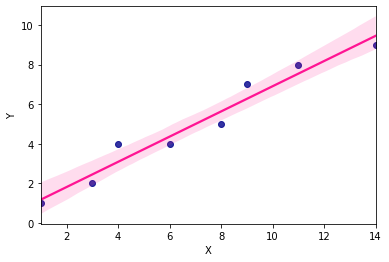

In [107]:
sns.regplot(x='X',y='Y',data=ironbeers_df,scatter_kws={'color':'darkblue'},line_kws={'color':'deeppink'})

In [ ]:
# We can see that our original hypothesis was wrong

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

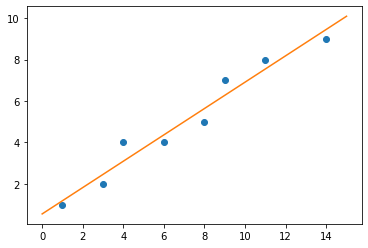

In [145]:
a1 , b1 = slin(told,stay)

xlins = np.arange(0,max(told)+2)

ylins = a1*xlins+b1

fig, ax = plt.subplots()
ax.plot(told,stay,'o')
ax.plot(xlins,ylins)

In [110]:
# I'm tired of commenting the same things. I'm sure you're tired of reading them

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [ ]:
# After more than a year of lockdown I'm pretty sure people will stay for beers whenever they can

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [114]:
ironbeers_df['expected_Y'] = told*a1+b1

ironbeers_df

,X,Y,expected_Y
0,1,1,1.181818
1,3,2,2.454545
2,4,4,3.090909
3,6,4,4.363636
4,8,5,5.636364
5,9,7,6.272727
6,11,8,7.545455
7,14,9,9.454545


#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

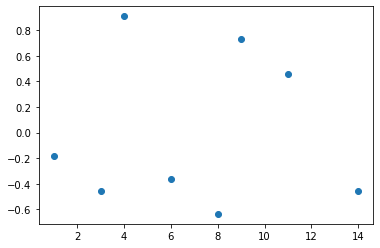

In [118]:
ironbeers_df['error'] = ironbeers_df['Y']-ironbeers_df['expected_Y']
ironbeers_df

plt.plot(ironbeers_df['X'],ironbeers_df['error'],'o')

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [119]:
ironbeers_df

,X,Y,expected_Y,error
0,1,1,1.181818,-0.181818
1,3,2,2.454545,-0.454545
2,4,4,3.090909,0.909091
3,6,4,4.363636,-0.363636
4,8,5,5.636364,-0.636364
5,9,7,6.272727,0.727273
6,11,8,7.545455,0.454545
7,14,9,9.454545,-0.454545


In [ ]:
#Error is highest for X=4 and X=9

#### 4.- Remove the points with a high error and recalculate the regression line.

In [140]:
goodones = ironbeers_df[np.abs(ironbeers_df['error'])<0.7]
bad = ironbeers_df[np.abs(ironbeers_df['error'])>0.7]
goodones

,X,Y,expected_Y,error
0,1,1,1.181818,-0.181818
1,3,2,2.454545,-0.454545
3,6,4,4.363636,-0.363636
4,8,5,5.636364,-0.636364
6,11,8,7.545455,0.454545
7,14,9,9.454545,-0.454545


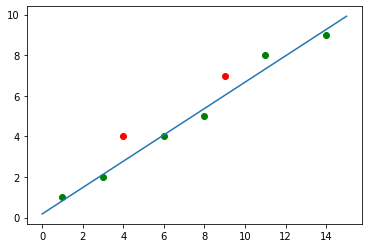

In [141]:
a2,b2 = slin(goodones['X'],goodones['Y'])

xlins = np.arange(0,max(goodones['X'])+2)

ylins = a2*xlins+b2

fig, ax = plt.subplots()
ax.plot(bad['X'],bad['Y'],'ro')
ax.plot(goodones['X'],goodones['Y'],'go')
ax.plot(xlins,ylins)

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [142]:
cov3,cor3 = covcor(goodones['X'],goodones['Y'])

cor3

0.9928560954470167

In [ ]:
#If we eliminate the values with higher error we get a better fit, so now the correlation is almost perfect (=1)